<a href="https://colab.research.google.com/github/DhruvPatel1409/medicine-recommendation-sysmtem/blob/main/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [102]:
file_path = '/content/modified_medical_data.csv'  # Change to your actual file path
df = pd.read_csv(file_path)

In [103]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Age Group,Gender,Severity,prognosis,Hydrocortisone cream,Atenolol,Orlistat,Supportive care,Balm,Hydrocortisone,Oral contraceptives,Vitamin B12 supplements,Latanoprost,Levocetirizine,NSAIDs,Biotin,Levothyroxine,PrEP,Artificial tears,Cyproheptadine,Lidocaine ointment,Thiamine,Lidocaine,N-acetylcysteine,Loperamide,Speech therapy,Dicyclomine,Beta-blockers,Magnesium supplements,Hepatitis B vaccination,Bilirubin,Nifedipine,Amoxicillin,Topical steroids,Polyethylene glycol,Ibuprofen,Vitamins,Fluoxetine,Metoclopramide,Clindamycin,Metformin,Diazepam,Ceftriaxone,Aspirin,Pseudoephedrine,Iron supplements,Antibiotics,Furosemide,Phenobarbital,Clopidogrel,Mesalamine,Physiotherapy,Antipsychotics,Vitamin C,Acetaminophen,Genetic counseling,Pantoprazole,Cetirizine,Naproxen,Alprazolam,Phenazopyridine,Moisturizers,Compression therapy,Guaifenesin,Paracetamol,Mirtazapine,Antihistamine eye drops,Antifungals,Antihistamines,Mupirocin,Simethicone,Modafinil,Oral Rehydration Salts,Protein Supplements,Albuterol,Eye drops,Kenalog,Coal tar,Laxatives,Parkinson medications,Dextromethorphan,Betahistine,Lozenges,Oxybutynin,Phenylephrine,Salicylic acid,Ondansetron,Corticosteroids,Atropine,Electrolytes,Vitamin B12,Ranitidine,Phentermine,Piracetam,Prednisolone,Nitrofurantoin,Clonazepam,Desmopressin,Multivitamins
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Child,Female,Mild,Fungal infection,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [104]:
df.drop(columns=['Age Group', 'Gender', 'Severity '],axis=1,inplace=True)

In [105]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Hydrocortisone cream,Atenolol,Orlistat,Supportive care,Balm,Hydrocortisone,Oral contraceptives,Vitamin B12 supplements,Latanoprost,Levocetirizine,NSAIDs,Biotin,Levothyroxine,PrEP,Artificial tears,Cyproheptadine,Lidocaine ointment,Thiamine,Lidocaine,N-acetylcysteine,Loperamide,Speech therapy,Dicyclomine,Beta-blockers,Magnesium supplements,Hepatitis B vaccination,Bilirubin,Nifedipine,Amoxicillin,Topical steroids,Polyethylene glycol,Ibuprofen,Vitamins,Fluoxetine,Metoclopramide,Clindamycin,Metformin,Diazepam,Ceftriaxone,Aspirin,Pseudoephedrine,Iron supplements,Antibiotics,Furosemide,Phenobarbital,Clopidogrel,Mesalamine,Physiotherapy,Antipsychotics,Vitamin C,Acetaminophen,Genetic counseling,Pantoprazole,Cetirizine,Naproxen,Alprazolam,Phenazopyridine,Moisturizers,Compression therapy,Guaifenesin,Paracetamol,Mirtazapine,Antihistamine eye drops,Antifungals,Antihistamines,Mupirocin,Simethicone,Modafinil,Oral Rehydration Salts,Protein Supplements,Albuterol,Eye drops,Kenalog,Coal tar,Laxatives,Parkinson medications,Dextromethorphan,Betahistine,Lozenges,Oxybutynin,Phenylephrine,Salicylic acid,Ondansetron,Corticosteroids,Atropine,Electrolytes,Vitamin B12,Ranitidine,Phentermine,Piracetam,Prednisolone,Nitrofurantoin,Clonazepam,Desmopressin,Multivitamins
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [106]:
df_encoded = pd.get_dummies(df, columns=['prognosis'], prefix_sep='_', drop_first=False)
df_encoded = df_encoded.astype(int)
df_encoded.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Hydrocortisone cream,Atenolol,Orlistat,Supportive care,Balm,Hydrocortisone,Oral contraceptives,Vitamin B12 supplements,Latanoprost,Levocetirizine,NSAIDs,Biotin,Levothyroxine,PrEP,Artificial tears,Cyproheptadine,Lidocaine ointment,Thiamine,Lidocaine,N-acetylcysteine,Loperamide,Speech therapy,Dicyclomine,Beta-blockers,Magnesium supplements,Hepatitis B vaccination,Bilirubin,Nifedipine,Amoxicillin,Topical steroids,Polyethylene glycol,Ibuprofen,Vitamins,Fluoxetine,Metoclopramide,Clindamycin,Metformin,Diazepam,Ceftriaxone,Aspirin,Pseudoephedrine,Iron supplements,Antibiotics,Furosemide,Phenobarbital,Clopidogrel,Mesalamine,Physiotherapy,Antipsychotics,Vitamin C,Acetaminophen,Genetic counseling,Pantoprazole,Cetirizine,Naproxen,Alprazolam,Phenazopyridine,Moisturizers,Compression therapy,Guaifenesin,Paracetamol,Mirtazapine,Antihistamine eye drops,Antifungals,Antihistamines,Mupirocin,Simethicone,Modafinil,Oral Rehydration Salts,Protein Supplements,Albuterol,Eye drops,Kenalog,Coal tar,Laxatives,Parkinson medications,Dextromethorphan,Betahistine,Lozenges,Oxybutynin,Phenylephrine,Salicylic acid,Ondansetron,Corticosteroids,Atropine,Electrolytes,Vitamin B12,Ranitidine,Phentermine,Piracetam,Prednisolone,Nitrofurantoin,Clonazepam,Desmopressin,Multivitamins,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,prognosis_Common Cold,prognosis_Dengue,prognosis_Diabetes,prognosis_Dimorphic hemmorhoids(piles),prognosis_Drug Reaction,prognosis_Fungal infection,prognosis_GERD,prognosis_Gastroenteritis,prognosis_Heart attack,prognosis_Hepatitis B,prognosis_Hepatitis C,prognosis_Hepatitis D,prognosis_Hepatitis E,prognosis_Hypertension,prognosis_Hyperthyroidism,prognosis_Hypoglycemia,prognosis_Hypothyroidism,prognosis_Impetigo,prognosis_Jaundice,prognosis_Malaria,progn

In [107]:
# df_encoded = pd.get_dummies(df, columns=['Age Group', 'Gender', 'Severity ', 'prognosis'], prefix_sep='_', drop_first=False)
# df_encoded = df_encoded.astype(int)
# print(df_encoded)

In [108]:
column_list = list(df_encoded.columns)
print(column_list)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [109]:
# symptomps = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze', 'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly', 'Gender_Female', 'Gender_Male', 'Severity _Mild', 'Severity _Moderate', 'Severity _Severe']

In [110]:
symptomps = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']

In [111]:
medicines = ['prognosis_(vertigo) Paroymsal  Positional Vertigo', 'prognosis_AIDS', 'prognosis_Acne', 'prognosis_Alcoholic hepatitis', 'prognosis_Allergy', 'prognosis_Arthritis', 'prognosis_Bronchial Asthma', 'prognosis_Cervical spondylosis', 'prognosis_Chicken pox', 'prognosis_Chronic cholestasis', 'prognosis_Common Cold', 'prognosis_Dengue', 'prognosis_Diabetes ', 'prognosis_Dimorphic hemmorhoids(piles)', 'prognosis_Drug Reaction', 'prognosis_Fungal infection', 'prognosis_GERD', 'prognosis_Gastroenteritis', 'prognosis_Heart attack', 'prognosis_Hepatitis B', 'prognosis_Hepatitis C', 'prognosis_Hepatitis D', 'prognosis_Hepatitis E', 'prognosis_Hypertension ', 'prognosis_Hyperthyroidism', 'prognosis_Hypoglycemia', 'prognosis_Hypothyroidism', 'prognosis_Impetigo', 'prognosis_Jaundice', 'prognosis_Malaria', 'prognosis_Migraine', 'prognosis_Osteoarthristis', 'prognosis_Paralysis (brain hemorrhage)', 'prognosis_Peptic ulcer diseae', 'prognosis_Pneumonia', 'prognosis_Psoriasis', 'prognosis_Tuberculosis', 'prognosis_Typhoid', 'prognosis_Urinary tract infection', 'prognosis_Varicose veins', 'prognosis_hepatitis A','Hydrocortisone cream', 'Atenolol', 'Orlistat', 'Supportive care', 'Balm', 'Hydrocortisone', 'Oral contraceptives', 'Vitamin B12 supplements', 'Latanoprost', 'Levocetirizine', 'NSAIDs', 'Biotin', 'Levothyroxine', 'PrEP', 'Artificial tears', 'Cyproheptadine', 'Lidocaine ointment', 'Thiamine', 'Lidocaine', 'N-acetylcysteine', 'Loperamide', 'Speech therapy', 'Dicyclomine', 'Beta-blockers', 'Magnesium supplements', 'Hepatitis B vaccination', 'Bilirubin', 'Nifedipine', 'Amoxicillin', 'Topical steroids', 'Polyethylene glycol', 'Ibuprofen', 'Vitamins', 'Fluoxetine', 'Metoclopramide', 'Clindamycin', 'Metformin', 'Diazepam', 'Ceftriaxone', 'Aspirin', 'Pseudoephedrine', 'Iron supplements', 'Antibiotics', 'Furosemide', 'Phenobarbital', 'Clopidogrel', 'Mesalamine', 'Physiotherapy', 'Antipsychotics', 'Vitamin C', 'Acetaminophen', 'Genetic counseling', 'Pantoprazole', 'Cetirizine', 'Naproxen', 'Alprazolam', 'Phenazopyridine', 'Moisturizers', 'Compression therapy', 'Guaifenesin', 'Paracetamol', 'Mirtazapine', 'Antihistamine eye drops', 'Antifungals', 'Antihistamines', 'Mupirocin', 'Simethicone', 'Modafinil', 'Oral Rehydration Salts', 'Protein Supplements', 'Albuterol', 'Eye drops', 'Kenalog', 'Coal tar', 'Laxatives', 'Parkinson medications', 'Dextromethorphan', 'Betahistine', 'Lozenges', 'Oxybutynin', 'Phenylephrine', 'Salicylic acid', 'Ondansetron', 'Corticosteroids', 'Atropine', 'Electrolytes', 'Vitamin B12', 'Ranitidine', 'Phentermine', 'Piracetam', 'Prednisolone', 'Nitrofurantoin', 'Clonazepam', 'Desmopressin', 'Multivitamins']

In [112]:
X = df_encoded[symptomps]
Y = df_encoded[medicines]

In [113]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
Y.head()

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,prognosis_Common Cold,prognosis_Dengue,prognosis_Diabetes,prognosis_Dimorphic hemmorhoids(piles),prognosis_Drug Reaction,prognosis_Fungal infection,prognosis_GERD,prognosis_Gastroenteritis,prognosis_Heart attack,prognosis_Hepatitis B,prognosis_Hepatitis C,prognosis_Hepatitis D,prognosis_Hepatitis E,prognosis_Hypertension,prognosis_Hyperthyroidism,prognosis_Hypoglycemia,prognosis_Hypothyroidism,prognosis_Impetigo,prognosis_Jaundice,prognosis_Malaria,prognosis_Migraine,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A,Hydrocortisone cream,Atenolol,Orlistat,Supportive care,Balm,Hydrocortisone,Oral contraceptives,Vitamin B12 supplements,Latanoprost,Levocetirizine,NSAIDs,Biotin,Levothyroxine,PrEP,Artificial tears,Cyproheptadine,Lidocaine ointment,Thiamine,Lidocaine,N-acetylcysteine,Loperamide,Speech therapy,Dicyclomine,Beta-blockers,Magnesium supplements,Hepatitis B vaccination,Bilirubin,Nifedipine,Amoxicillin,Topical steroids,Polyethylene glycol,Ibuprofen,Vitamins,Fluoxetine,Metoclopramide,Clindamycin,Metformin,Diazepam,Ceftriaxone,Aspirin,Pseudoephedrine,Iron supplements,Antibiotics,Furosemide,Phenobarbital,Clopidogrel,Mesalamine,Physiotherapy,Antipsychotics,Vitamin C,Acetaminophen,Genetic counseling,Pantoprazole,Cetirizine,Naproxen,Alprazolam,Phenazopyridine,Moisturizers,Compression therapy,Guaifenesin,Paracetamol,Mirtazapine,Antihistamine eye drops,Antifungals,Antihistamines,Mupirocin,Simethicone,Modafinil,Oral Rehydration Salts,Protein Supplements,Albuterol,Eye drops,Kenalog,Coal tar,Laxatives,Parkinson medications,Dextromethorphan,Betahistine,Lozenges,Oxybutynin,Phenylephrine,Salicylic acid,Ondansetron,Corticosteroids,Atropine,Electrolytes,Vitamin B12,Ranitidine,Phentermine,Piracetam,Prednisolone,Nitrofurantoin,Clonazepam,Desmopressin,Multivitamins
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [116]:
from keras.layers import BatchNormalization, LeakyReLU
from keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(medicines), activation='sigmoid')
])

In [117]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [119]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test),callbacks=[early_stopping])

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.0077 - loss: 0.4792 - val_accuracy: 0.0000e+00 - val_loss: 0.1884
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1445 - val_accuracy: 0.0000e+00 - val_loss: 0.1145
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 6.6272e-04 - loss: 0.1057 - val_accuracy: 0.0254 - val_loss: 0.0673
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0124 - loss: 0.0750 - val_accuracy: 0.0762 - val_loss: 0.0374
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0264 - loss: 0.0546 - val_accuracy: 0.0681 - val_loss: 0.0228
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0496 - loss: 0.0422 - val_accuracy: 0.1463 - val_loss: 0.0167
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0624 - loss: 0.0346 - val_accuracy: 0.1900 - val_loss: 0.0134
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0705 - loss:

In [120]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.0050 
Test Accuracy: 85.06%


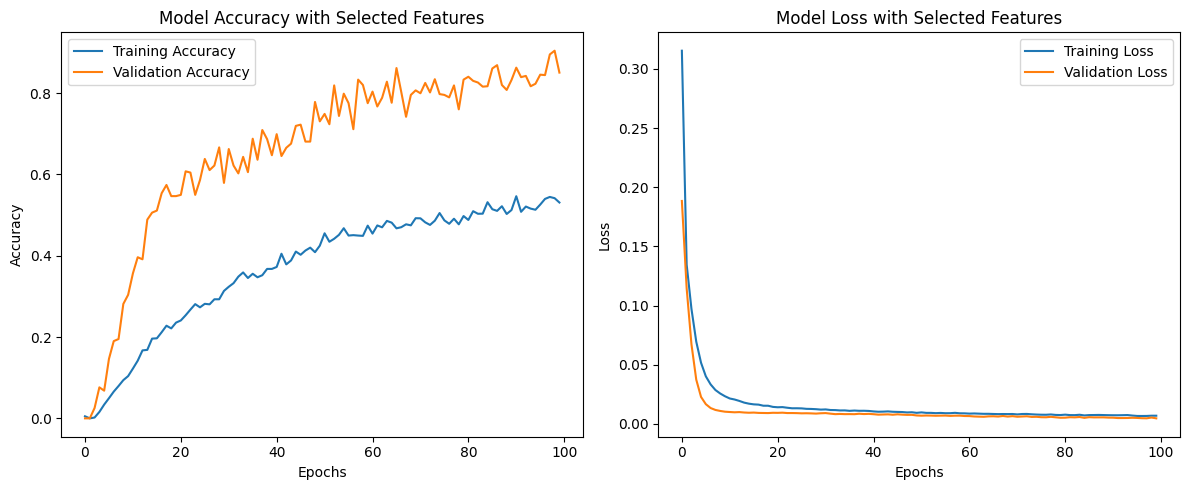

In [121]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Selected Features')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Selected Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [125]:
input_layer_weights = model.layers[0].get_weights()[0]  # First layer weights

# Calculating feature importance as the sum of absolute weights for each input feature
feature_importance = np.sum(np.abs(input_layer_weights), axis=1)

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_n = 20
top_features = importance_df.head(top_n)['Feature'].values
print(f"Top {top_n} important features based on neural network: {top_features}")

# Redefine X with only the selected top features for further modeling if needed
X_selected = X[top_features]

Top 20 important features based on neural network: ['fatigue' 'diarrhoea' 'vomiting' 'itching' 'shivering' 'sweating'
 'scurring' 'continuous_feel_of_urine' 'spotting_ urination'
 'stomach_pain' 'watering_from_eyes' 'patches_in_throat' 'skin_rash'
 'belly_pain' 'painful_walking' 'nausea' 'lethargy' 'pus_filled_pimples'
 'weakness_in_limbs' 'unsteadiness']


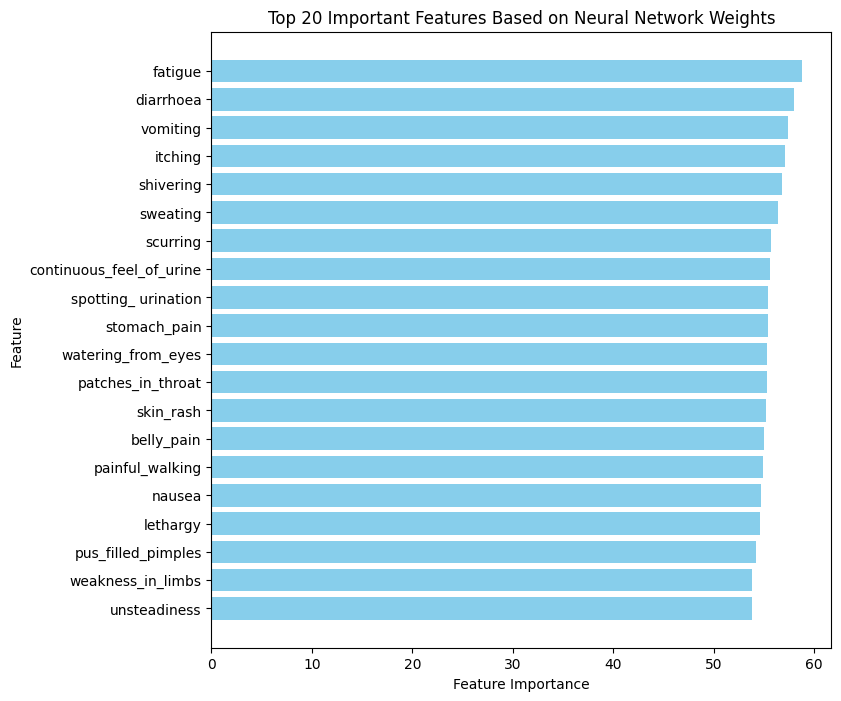

In [130]:
plt.figure(figsize=(8, 8))
# Accessing feature names and importances from importance_df
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Important Features Based on Neural Network Weights')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

In [123]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
import numpy as np

# Example symptom input (already padded to 139 features as required by the model)
symptom_input = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]])
num_features_required = 131
input_data_padded = np.pad(symptom_input, ((0, 0), (0, max(0, num_features_required - symptom_input.shape[1]))), 'constant')

# Make a prediction
Y_pred = model.predict(input_data_padded)

# Process the output
predicted_medicines = (Y_pred > 0.5).astype(int)
predicted_medicine_labels = [medicines[i] for i, pred in enumerate(predicted_medicines[0]) if pred]
disease_name = predicted_medicine_labels[0]
recommended_medicines = predicted_medicine_labels[1:]

# Output results
print("Disease:", disease_name)
print("Recommended Medicines:", recommended_medicines)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Disease: prognosis_Fungal infection
Recommended Medicines: ['Hydrocortisone cream', 'Prednisolone']


In [133]:
import numpy as np

# Define a list of all symptoms in the correct order of features
all_symptomps = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']

# Function to convert symptom names to binary encoding
def encode_symptoms(input_symptoms, all_symptoms):
    encoded_symptoms = np.zeros(len(all_symptoms))
    for symptom in input_symptoms:
        if symptom in all_symptoms:
            index = all_symptoms.index(symptom)
            encoded_symptoms[index] = 1
    return encoded_symptoms.reshape(1, -1)

# Example input symptoms (replace with actual symptoms you want to input)
input_symptoms = ['skin_rash','nodal_skin_eruptions','dischromic _patches']  # Replace with chosen symptoms

# Encode the symptoms to match the model's input shape
symptom_input = encode_symptoms(input_symptoms, all_symptomps)

# Make a prediction
Y_pred = model.predict(symptom_input)

# Process the output
predicted_medicines = (Y_pred > 0.5).astype(int)
predicted_medicine_labels = [medicines[i] for i, pred in enumerate(predicted_medicines[0]) if pred]

# Extract disease name and recommended medicines
disease_name = predicted_medicine_labels[0]
recommended_medicines = predicted_medicine_labels[1:]

# Output results
print("Disease:", disease_name)
print("Recommended Medicines:", recommended_medicines)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Disease: prognosis_Fungal infection
Recommended Medicines: ['Hydrocortisone cream', 'Prednisolone']
